<span style="color:white;font-size: 40px; font-family: Arial; font-weight: bold;"> E-Commerce Data Analysis </span>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data_frame = pd.read_csv("ecommerce.csv")

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [6]:
data_frame.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

<span style="color:white;font-size: 35px; font-family: Arial;"> Gender Ratio - Bar and Pie Chart </span>

In [7]:
data_frame["Gender"]

0         Female
1         Female
2         Female
3         Female
4         Female
           ...  
249995      Male
249996    Female
249997    Female
249998      Male
249999      Male
Name: Gender, Length: 250000, dtype: object

In [8]:
data_frame["Gender"].isnull().sum()

0

In [9]:
data_frame["Gender"].value_counts()

Gender
Male      125676
Female    124324
Name: count, dtype: int64

In [10]:
gender_count = data_frame["Gender"].value_counts()

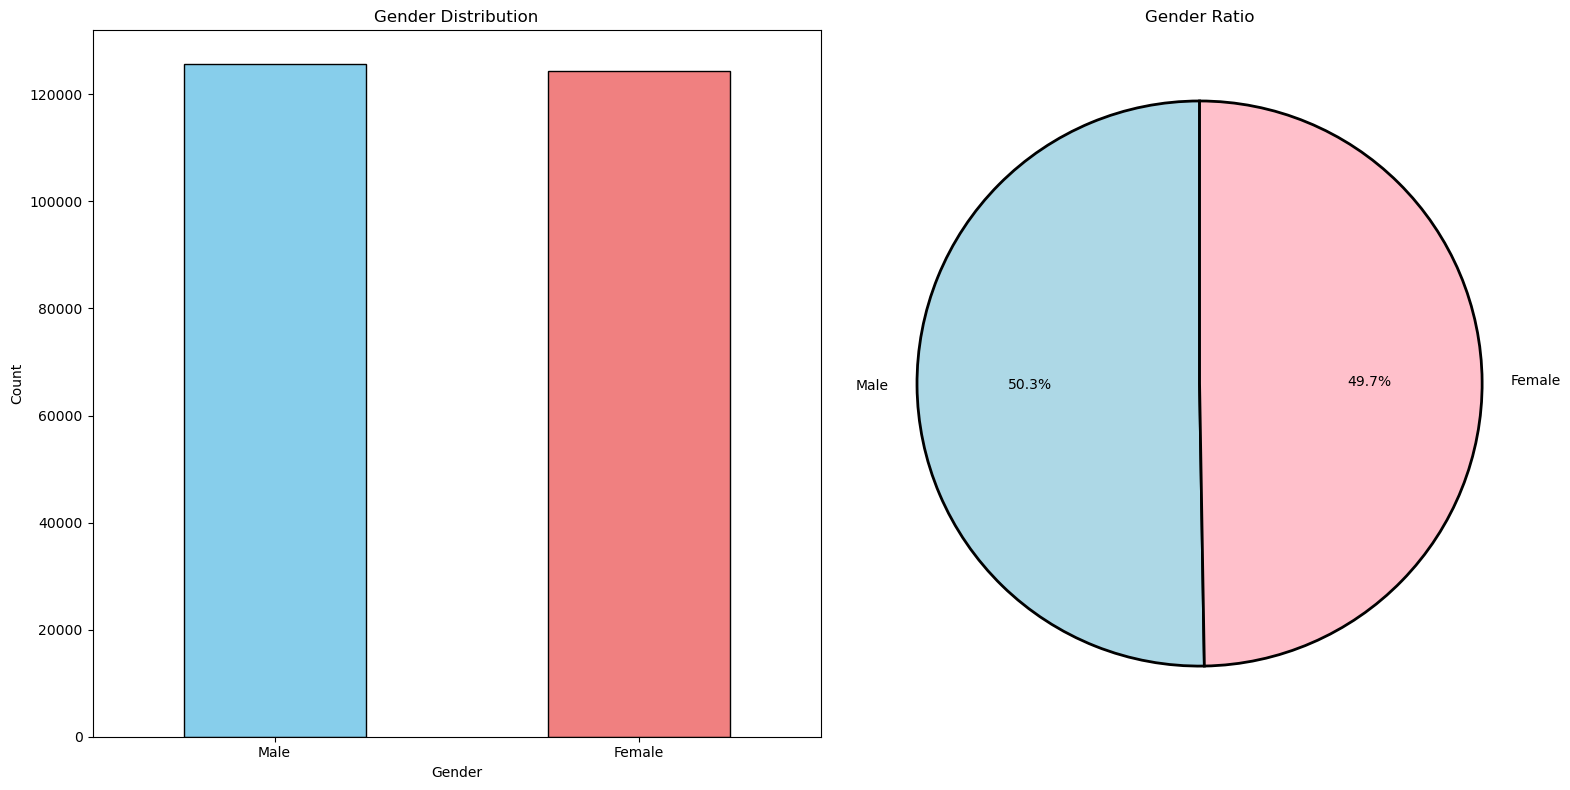

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

gender_count.plot(kind='bar', color=['skyblue', 'lightcoral'], ax=axes[0],edgecolor='black', linewidth=1.0)
ax=axes[0].set_title("Gender Distribution")
ax=axes[0].set_xlabel("Gender")
ax=axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=0)


gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'],ax=axes[1])
axes[1].set_title('Gender Ratio')
axes[1].set_ylabel('')
axes[1].wedgeprops={'edgecolor': 'black', 'linewidth': 2}
for wedge in axes[1].patches:
    wedge.set_edgecolor('black')
    wedge.set_linewidth(2)


plt.tight_layout()
plt.show()

<span style="color:white;font-size: 35px; font-family: Arial;"> Payment Method - Bar and Pie Chart </span>

In [12]:
data_frame["Payment Method"].isnull().sum()

0

In [13]:
data_frame["Payment Method"].unique()

array(['PayPal', 'Credit Card', 'Cash'], dtype=object)

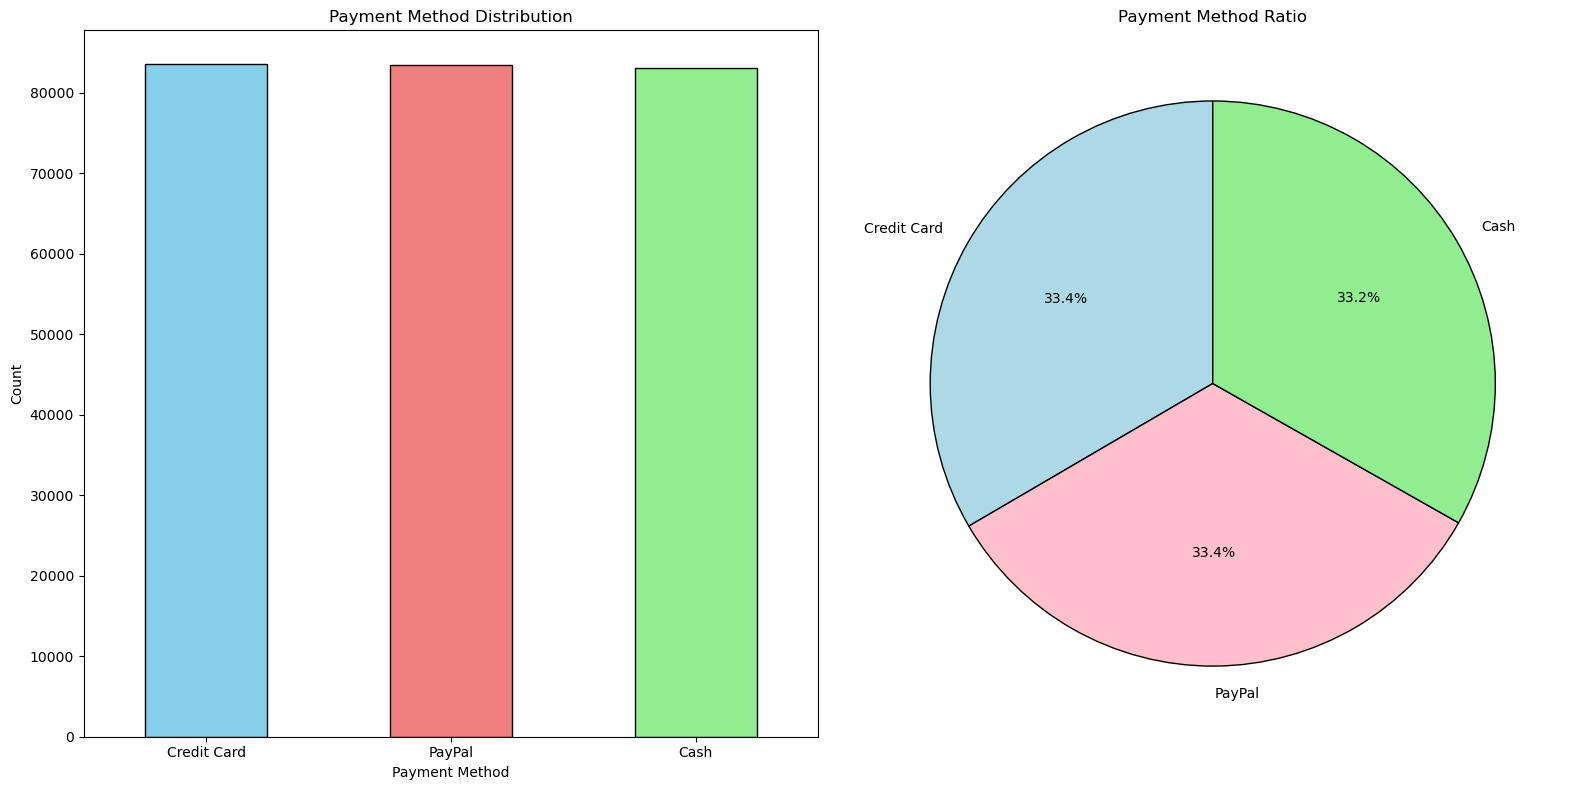

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
payment_count = data_frame["Payment Method"].value_counts()

payment_count.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'], ax=axes[0], edgecolor='black', linewidth=1.0)
axes[0].set_title("Payment Method Distribution")
axes[0].set_xlabel("Payment Method")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=0)

payment_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink', 'lightgreen'], ax=axes[1])
axes[1].set_title('Payment Method Ratio')
axes[1].set_ylabel('')

for wedge in axes[1].patches:
    wedge.set_edgecolor('black')
    wedge.set_linewidth(1)

plt.tight_layout()
plt.show()

<span style="color:white;font-size: 35px; font-family: Arial;"> Most Purchased Category - Horizontal Bar Chart </span>

In [15]:
data_frame["Product Category"].isnull().sum()

0

In [ ]:
category_sales = data_frame.groupby('Product Category')['Quantity'].sum().reset_index()
category_sales = category_sales.sort_values('Quantity', ascending=True)


C:\Users\Ashu\AppData\Local\Temp\ipykernel_25196\633192702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Ashu\AppData\Local\Temp\ipykernel_25196\633192702.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=14, weight='bold')


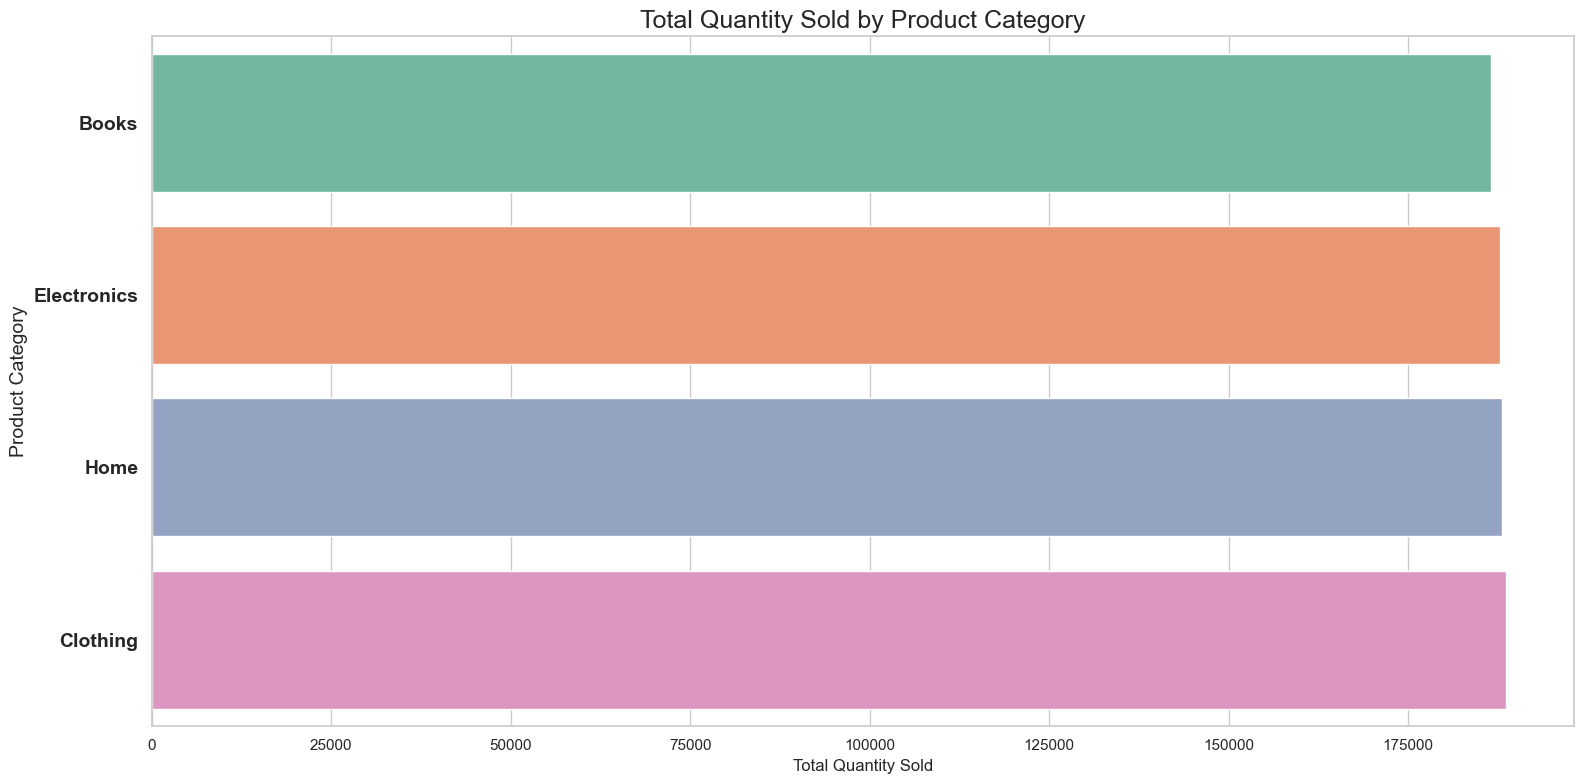

In [17]:
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid')

barplot = sns.barplot(
    data=category_sales,
    x='Quantity',
    y='Product Category',
    palette='Set2'
)


barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=14, weight='bold')
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Category', fontsize=14)

plt.title('Total Quantity Sold by Product Category', fontsize=18)

plt.tight_layout()
plt.show()


<span style="color:white;font-size: 35px; font-family: Arial;"> Age Group V/S Purchasing Amount - Line Chart </span>

In [18]:
data_frame['Age Group'] = pd.cut(data_frame['Age'], bins=[0, 20, 30, 40, 50, 60, 70], 
                            labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])

In [19]:
data_frame["Age Group"].isnull().sum()

0

In [20]:
data_frame["Age Group"].unique()

['31-40', '21-30', '0-20', '51-60', '41-50', '61-70']
Categories (6, object): ['0-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-70']

In [21]:
age_gender_purchase = data_frame.groupby(['Age Group', 'Gender'])['Total Purchase Amount'].sum().reset_index()

C:\Users\Ashu\AppData\Local\Temp\ipykernel_25196\1458579082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_purchase = data_frame.groupby(['Age Group', 'Gender'])['Total Purchase Amount'].sum().reset_index()


In [22]:
age_gender_pivot = age_gender_purchase.pivot(index='Age Group', columns='Gender', values='Total Purchase Amount')

<Figure size 1000x600 with 0 Axes>

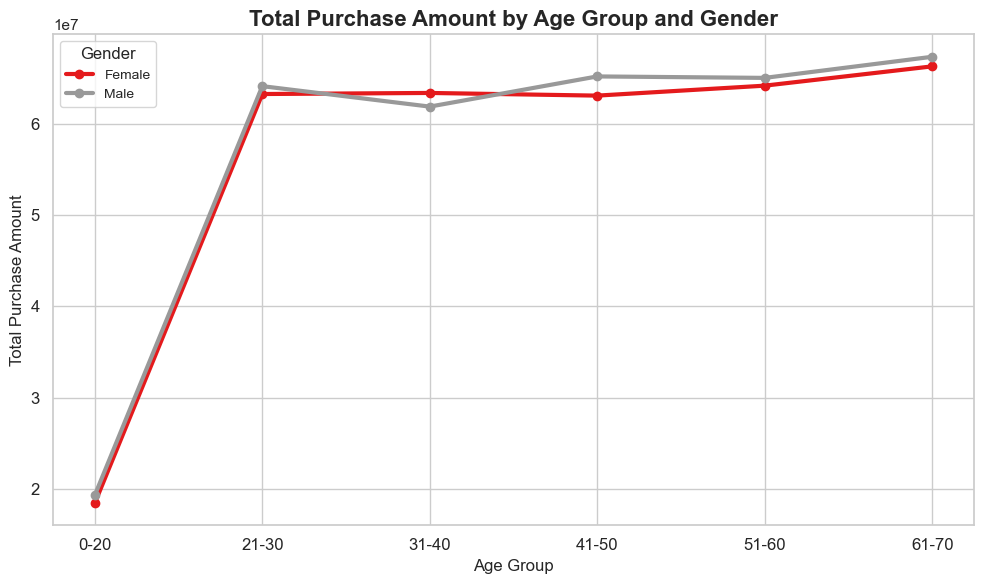

In [23]:
plt.figure(figsize=(10, 6))
age_gender_pivot.plot(kind='line', marker='o', linewidth=3, figsize=(10, 6), colormap='Set1')

plt.title('Total Purchase Amount by Age Group and Gender', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

<span style="color:white;font-size: 35px; font-family: Arial;"> Most Returned Category - Pie Chart </span>

In [24]:
data_frame["Returns"].isnull().sum()

47382

In [25]:
data_frame["Returns"].dropna()

0         1.0
1         1.0
2         1.0
3         0.0
4         1.0
         ... 
249994    0.0
249995    0.0
249996    1.0
249998    1.0
249999    0.0
Name: Returns, Length: 202618, dtype: float64

In [26]:
new_data_frame = data_frame.dropna(axis=0, how="any")

In [27]:
new_data_frame["Returns"].isnull().sum()

0

In [28]:
returns_by_category = new_data_frame[new_data_frame['Returns'] == 1].groupby('Product Category').size().reset_index(name='Returns')
returns_by_category = returns_by_category.sort_values('Returns', ascending=True)

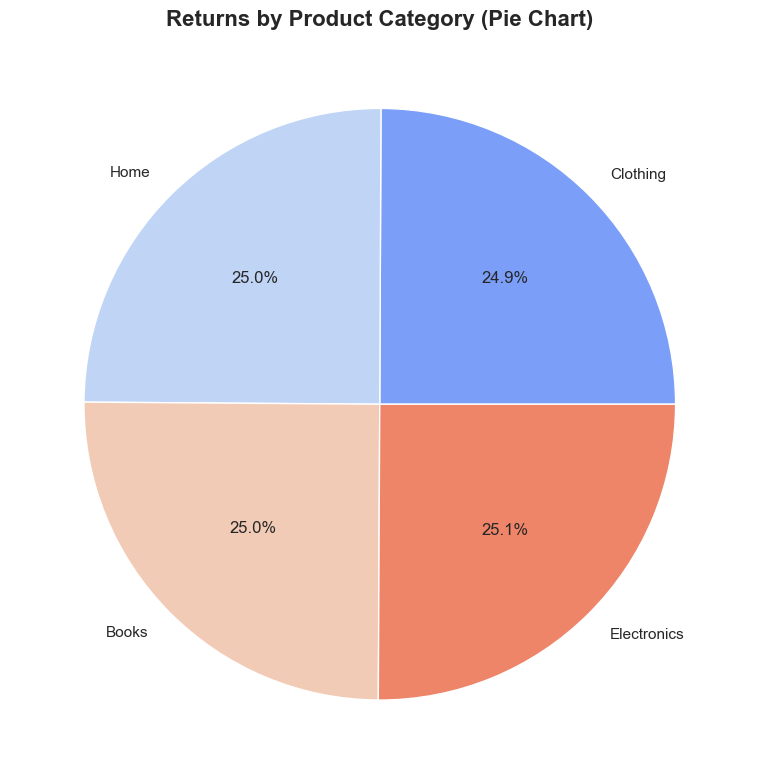

In [29]:
# Prepare data
returns = returns_by_category['Returns']
labels = returns_by_category['Product Category']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(returns, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(returns)))
plt.title('Returns by Product Category (Pie Chart)', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


<span style="color:white;font-size: 35px; font-family: Arial;"> Mode Of Payment Male V/S Female - Stack Bar Chart </span>

In [60]:
payment_gender = pd.crosstab(new_data_frame["Payment Method"], new_data_frame["Gender"])

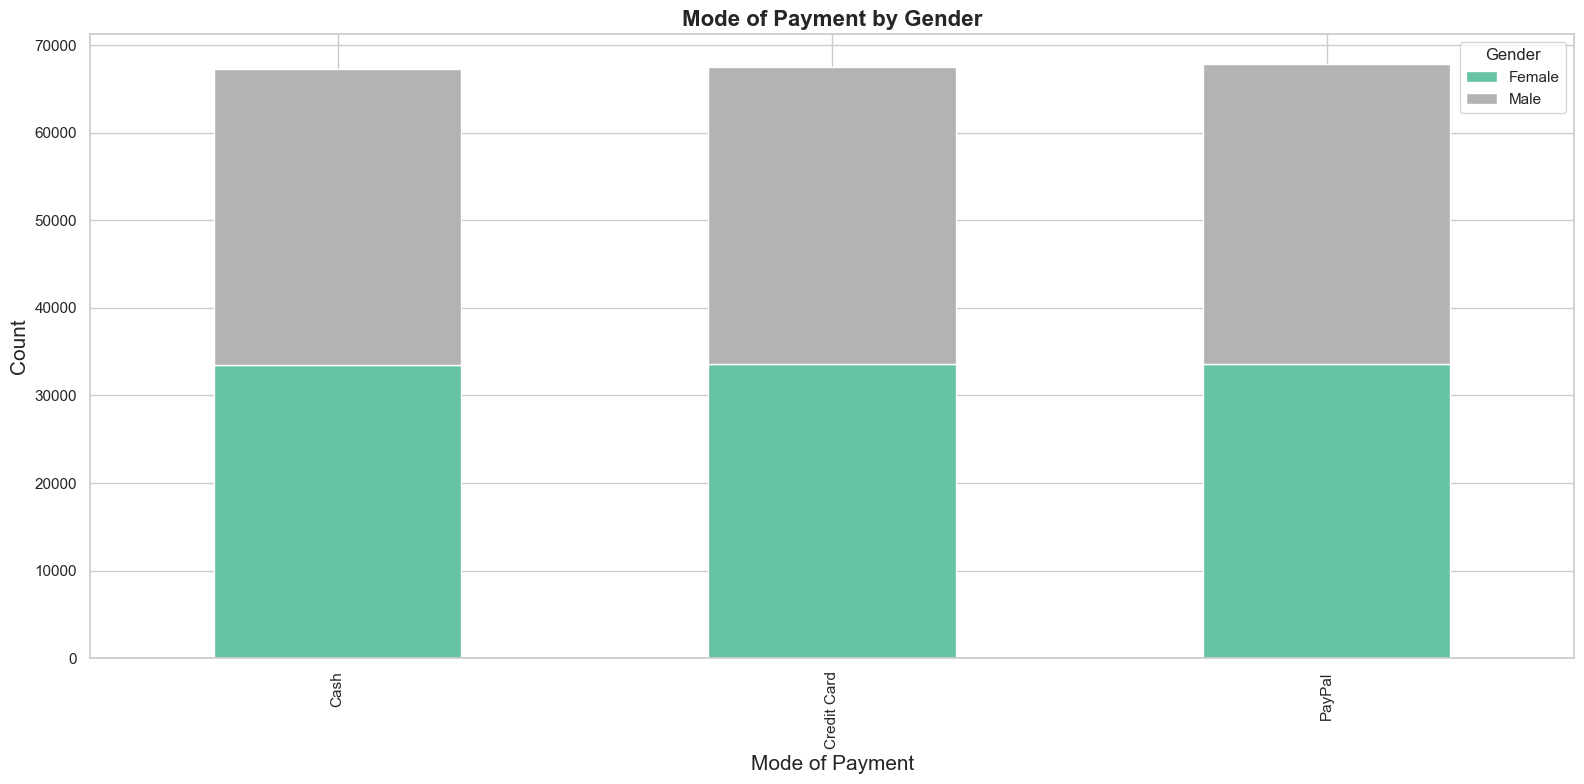

In [61]:

payment_gender.plot(kind='bar', stacked=True, colormap='Set2', figsize=(16, 8))
plt.title('Mode of Payment by Gender', fontsize=16, weight='bold')
plt.xlabel('Mode of Payment', fontsize = 15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<span style="color:white;font-size: 40px; font-family: Arial; font-weight:Bold"> Final Dashboard </span>

In [62]:
df = pd.read_csv('ecommerce.csv')

C:\Users\Ashu\AppData\Local\Temp\ipykernel_25196\2102511072.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_category.values, y=top_category.index, palette='crest')
C:\Users\Ashu\AppData\Local\Temp\ipykernel_25196\2102511072.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=returns_by_category.values, y=returns_by_category.index, palette='rocket')
C:\Users\Ashu\AppData\Local\Temp\ipykernel_25196\2102511072.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_mode.values, y=payment_mode.index, palette='pastel')


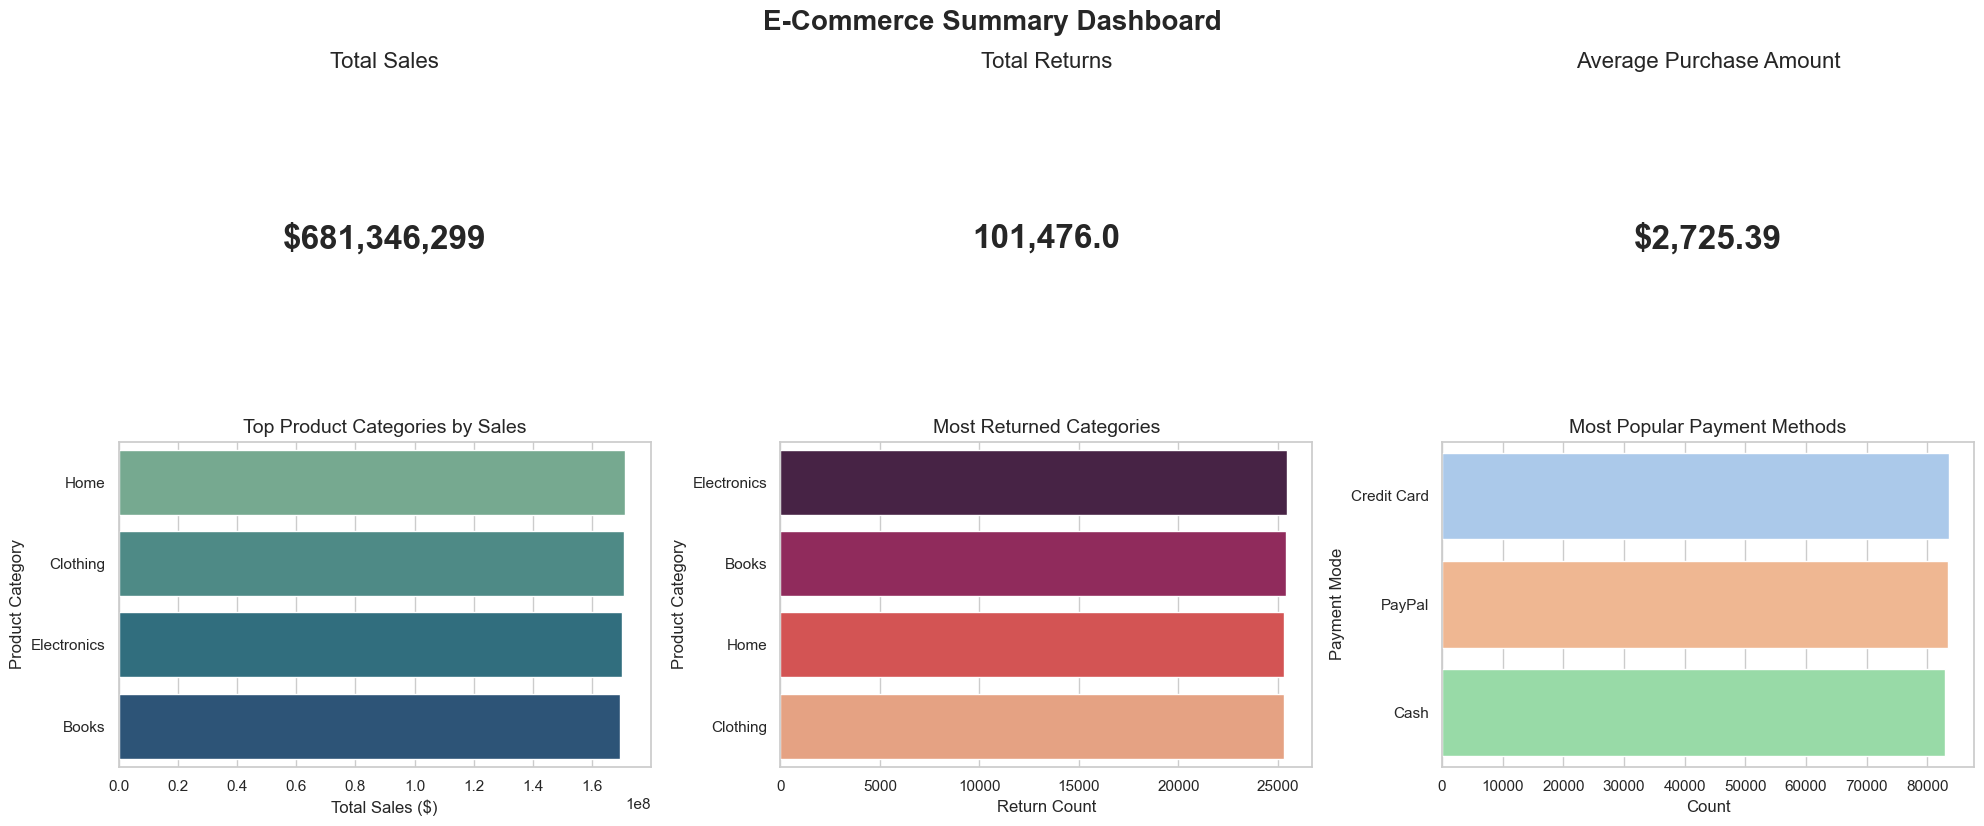

In [63]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))

total_sales = df["Total Purchase Amount"].sum()
plt.subplot(2, 3, 1)
plt.text(0.5, 0.5, f"${total_sales:,.0f}", fontsize=24, ha='center', va='center', weight='bold')
plt.title('Total Sales', fontsize=16)
plt.axis('off')

total_returns = df['Returns'].sum()
plt.subplot(2, 3, 2)
plt.text(0.5, 0.5, f"{total_returns:,}", fontsize=24, ha='center', va='center', weight='bold')
plt.title('Total Returns', fontsize=16)
plt.axis('off')

avg_purchase = df['Total Purchase Amount'].mean()
plt.subplot(2, 3, 3)
plt.text(0.5, 0.5, f"${avg_purchase:,.2f}", fontsize=24, ha='center', va='center', weight='bold')
plt.title('Average Purchase Amount', fontsize=16)
plt.axis('off')

top_category = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False).head(5)
plt.subplot(2, 3, 4)
sns.barplot(x=top_category.values, y=top_category.index, palette='crest')
plt.title('Top Product Categories by Sales', fontsize=14)
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')

returns_by_category = df[df['Returns'] == 1].groupby('Product Category').size().sort_values(ascending=False).head(5)
plt.subplot(2, 3, 5)
sns.barplot(x=returns_by_category.values, y=returns_by_category.index, palette='rocket')
plt.title('Most Returned Categories', fontsize=14)
plt.xlabel('Return Count')
plt.ylabel('Product Category')

payment_mode = df['Payment Method'].value_counts().head(5)
plt.subplot(2, 3, 6)
sns.barplot(x=payment_mode.values, y=payment_mode.index, palette='pastel')
plt.title('Most Popular Payment Methods', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Payment Mode')

plt.tight_layout()
plt.suptitle('E-Commerce Summary Dashboard', fontsize=20, weight='bold', y=1.03)
plt.show()